https://machinelearningmastery.com/use-dropout-lstm-networks-time-series-forecasting/

https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/

In [1]:
from google.colab import drive
drive.mount('/content/gdrive') # 點擊網址，選擇 Google 帳號登入，然後將授權碼貼回輸入框中

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!ln -fs /content/gdrive/My\ Drive/Colab\ Notebooks/Datascience /app

In [3]:
!tar -xzvf /app/cuDNN/cudnn-10.0-linux-x64-v7.5.0.56.tgz -C /usr/local/
!chmod a+r /usr/local/cuda/include/cudnn.h

# 檢查是否安裝成功
!cat /usr/local/cuda/include/cudnn.h | grep CUDNN_MAJOR -A 2

cuda/include/cudnn.h
cuda/NVIDIA_SLA_cuDNN_Support.txt
cuda/lib64/libcudnn.so
cuda/lib64/libcudnn.so.7
cuda/lib64/libcudnn.so.7.5.0
cuda/lib64/libcudnn_static.a
#define CUDNN_MAJOR 7
#define CUDNN_MINOR 5
#define CUDNN_PATCHLEVEL 0
--
#define CUDNN_VERSION (CUDNN_MAJOR * 1000 + CUDNN_MINOR * 100 + CUDNN_PATCHLEVEL)

#include "driver_types.h"


In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "/app/input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

2006-2015PowernTemp.csv
2006-2015PowernTempStr.csv
2006~2015system24hours_and_tempture_data.csv
2006_2015系統24小時與溫度資料統計.csv
2006~2015系統24小時與溫度資料統計.xlsx
2011-2018powerSaleTemp.csv
2011-2018x0x10x3x4.csv
BicycleWeather.csv
BuynSale.xlsx
buysale_raw.xlsx
data_description.txt
FremontBridge.csv
Google_Stock_Price_Test.csv
Google_Stock_Price_Train.csv
power_raw.xlsx
power_use102-108.csv
sales-of-shampoo-over-a-three-ye.csv
sample_submission.csv
Taipower_powerGen_sale.xlsx
temp102-108.csv
test.csv
train.csv
weather_102-108.csv
Weather_BuySale2011-2018.pbix
x0x10x3x4.pbix
x3x4Prosperity_indicator.csv
x3x4景氣.csv
氣溫95-108.xlsx
用電量_需量.csv
用電量_需量_use.csv



In [16]:
from pandas import read_table
df = read_table('/app/input/sales-of-shampoo-over-a-three-ye.csv',sep=',')
df[:10]

,Month,Sales of shampoo over a three year period
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3
5,1-06,168.5
6,1-07,231.8
7,1-08,224.5
8,1-09,192.8
9,1-10,122.9


In [17]:
df['Month'] = "2018-" + df['Month']
df = df[:-1]
df

,Month,Sales of shampoo over a three year period
0,2018-1-01,266.0
1,2018-1-02,145.9
2,2018-1-03,183.1
3,2018-1-04,119.3
4,2018-1-05,180.3
5,2018-1-06,168.5
6,2018-1-07,231.8
7,2018-1-08,224.5
8,2018-1-09,192.8
9,2018-1-10,122.9


In [0]:
columns = ['Date','Sales']
df.columns = columns

In [19]:
print(df.columns)

Index(['Date', 'Sales'], dtype='object')


In [22]:
df.Date = pd.to_datetime(df.Date, format='%Y-%m-%d')
print(type(df.Date))

<class 'pandas.core.series.Series'>


        Date  Sales
0 2018-01-01  266.0
1 2018-01-02  145.9
2 2018-01-03  183.1
3 2018-01-04  119.3
4 2018-01-05  180.3


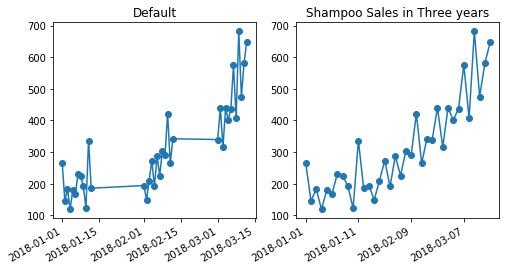

In [30]:
# load and plot dataset

from pandas import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
# load dataset
#def parser(x):
#	return datetime.strptime('190'+x, '%Y-%m')
#series = read_csv('../input/sales-of-shampoo-over-a-three-ye.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# summarize first few rows
# first we'll do it the default way, with gaps on weekends
date = df.Date.astype('O')
fig, axes = plt.subplots(ncols=2, figsize=(8, 4))
ax = axes[0]
ax.plot(date, df.Sales, 'o-')
ax.set_title("Default")
fig.autofmt_xdate()

print(df.head())
N = len(df)
ind = np.arange(N)

def format_date(x, pos=None):
  thisind = np.clip(int(x+0.5), 0, N-1)
  return date[thisind].strftime('%Y-%m-%d')

ax = axes[1]
ax.plot(ind, df.Sales, 'o-')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
ax.set_title("Shampoo Sales in Three years")
fig.autofmt_xdate()

plt.show()

In [13]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
import matplotlib
# be able to save images on server
#matplotlib.use('Agg')
from matplotlib import pyplot
import numpy

# date-time parsing function for loading the dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
	df = DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	return df



# scale train and test data to [-1, 1]
def scale(train, test):
	# fit scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)
	# transform train
	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)
	# transform test
	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled

# inverse scaling for a forecasted value
def invert_scale(scaler, X, yhat):
	new_row = [x for x in X] + [yhat]
	array = numpy.array(new_row)
	array = array.reshape(1, len(array))
	inverted = scaler.inverse_transform(array)
	return inverted[0, -1]

# evaluate the model on a dataset, returns RMSE in transformed units
def evaluate(model, raw_data, scaled_dataset, scaler, offset, batch_size):
	# separate
	X, y = scaled_dataset[:,0:-1], scaled_dataset[:,-1]
	# reshape
	reshaped = X.reshape(len(X), 1, 1)
	# forecast dataset
	output = model.predict(reshaped, batch_size=batch_size)
	# invert data transforms on forecast
	predictions = list()
	for i in range(len(output)):
		yhat = output[i,0]
		# invert scaling
		yhat = invert_scale(scaler, X[i], yhat)
		# invert differencing
		yhat = yhat + raw_data[i]
		# store forecast
		predictions.append(yhat)
	# report performance
	rmse = sqrt(mean_squared_error(raw_data[1:], predictions))
	# reset model state
	model.reset_states()
	return rmse

# fit an LSTM network to training data
def fit_lstm(train, test, raw, scaler, batch_size, nb_epoch, neurons):
	X, y = train[:, 0:-1], train[:, -1]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	# prepare model
	model = Sequential()
	model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
	model.add(Dense(1))
	model.compile(loss='mean_squared_error', optimizer='adam')
	# fit model
	train_rmse, test_rmse = list(), list()
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
		model.reset_states()
		# evaluate model on train data
		raw_train = raw[-(len(train)+len(test)+1):-len(test)]
		train_rmse.append(evaluate(model, raw_train, train, scaler, 0, batch_size))
		# evaluate model on test data
		raw_test = raw[-(len(test)+1):]
		test_rmse.append(evaluate(model, raw_test, test, scaler, 0, batch_size))
	history = DataFrame()
	history['train'], history['test'] = train_rmse, test_rmse
	return history

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)

Using TensorFlow backend.






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where








1) TrainRMSE=67.392058, TestRMSE=104.543866
2) TrainRMSE=66.785179, TestRMSE=97.470170
3) TrainRMSE=63.070105, TestRMSE=99.063515
4) TrainRMSE=58.657796, TestRMSE=90.696643
5) TrainRMSE=61.008893, TestRMSE=96.445631
6) TrainRMSE=62.886522, TestRMSE=94.294312
7) TrainRMSE=60.551328, TestRMSE=99.745857
8) TrainRMSE=61.566763, TestRMSE=97.155428
9) TrainRMSE=61.257668, TestRMSE=92.272514
10) TrainRMSE=60.337688, TestRMSE=95.613117


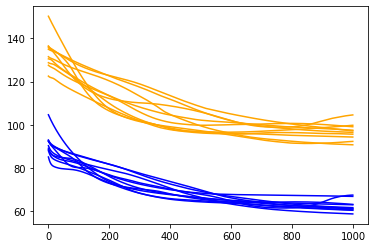

In [14]:
# config
n_lag = 1
n_repeats = 10
n_epochs = 1000 
n_batch = 4
n_neurons = 3
# load dataset
#series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# transform data to be stationary
#print(series.values)
raw_values = df['Sales of shampoo over a three year period'].values
diff_values = difference(raw_values, 1)
# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, n_lag)
supervised_values = supervised.values[n_lag:,:]
# split data into train and test-sets
train, test = supervised_values[0:-12], supervised_values[-12:]
# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)
# fit and evaluate model
train_trimmed = train_scaled[2:, :]
# run diagnostic tests
for i in range(n_repeats):
    history = fit_lstm(train_trimmed, test_scaled, raw_values, scaler, n_batch, n_epochs, n_neurons)
    pyplot.plot(history['train'], color='blue')
    pyplot.plot(history['test'], color='orange')
    print('%d) TrainRMSE=%f, TestRMSE=%f' % (i+1, history['train'].iloc[-1], history['test'].iloc[-1]))
pyplot.savefig('diagnostic_baseline.png')

